## **1. Importing Libraries**

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [87]:
url='players_22.csv'
df=pd.read_csv(url,sep=',')
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


## **2. Data Cleaning**

In [88]:
df.shape

(19239, 110)

In [89]:
df.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [90]:
print(f'La cantidad de total de vacios es ',df.isnull().sum().sum())

La cantidad de total de vacios es  152618


<Axes: >

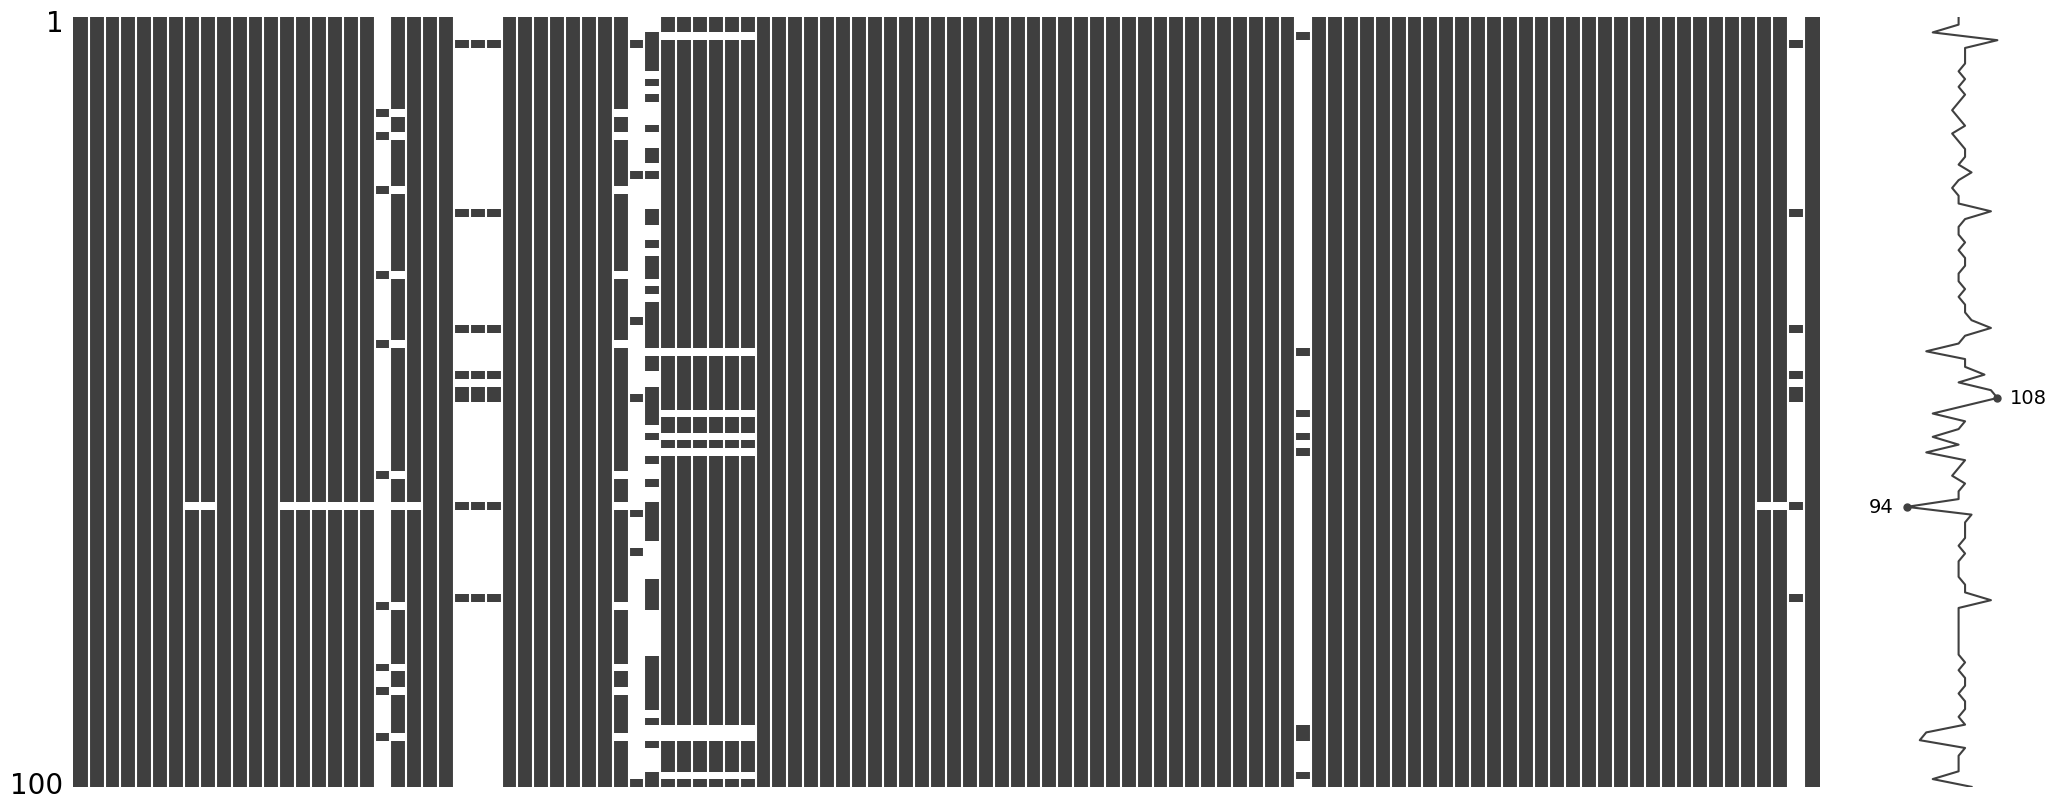

In [91]:
msno.matrix(df.sample(100))

<Axes: >

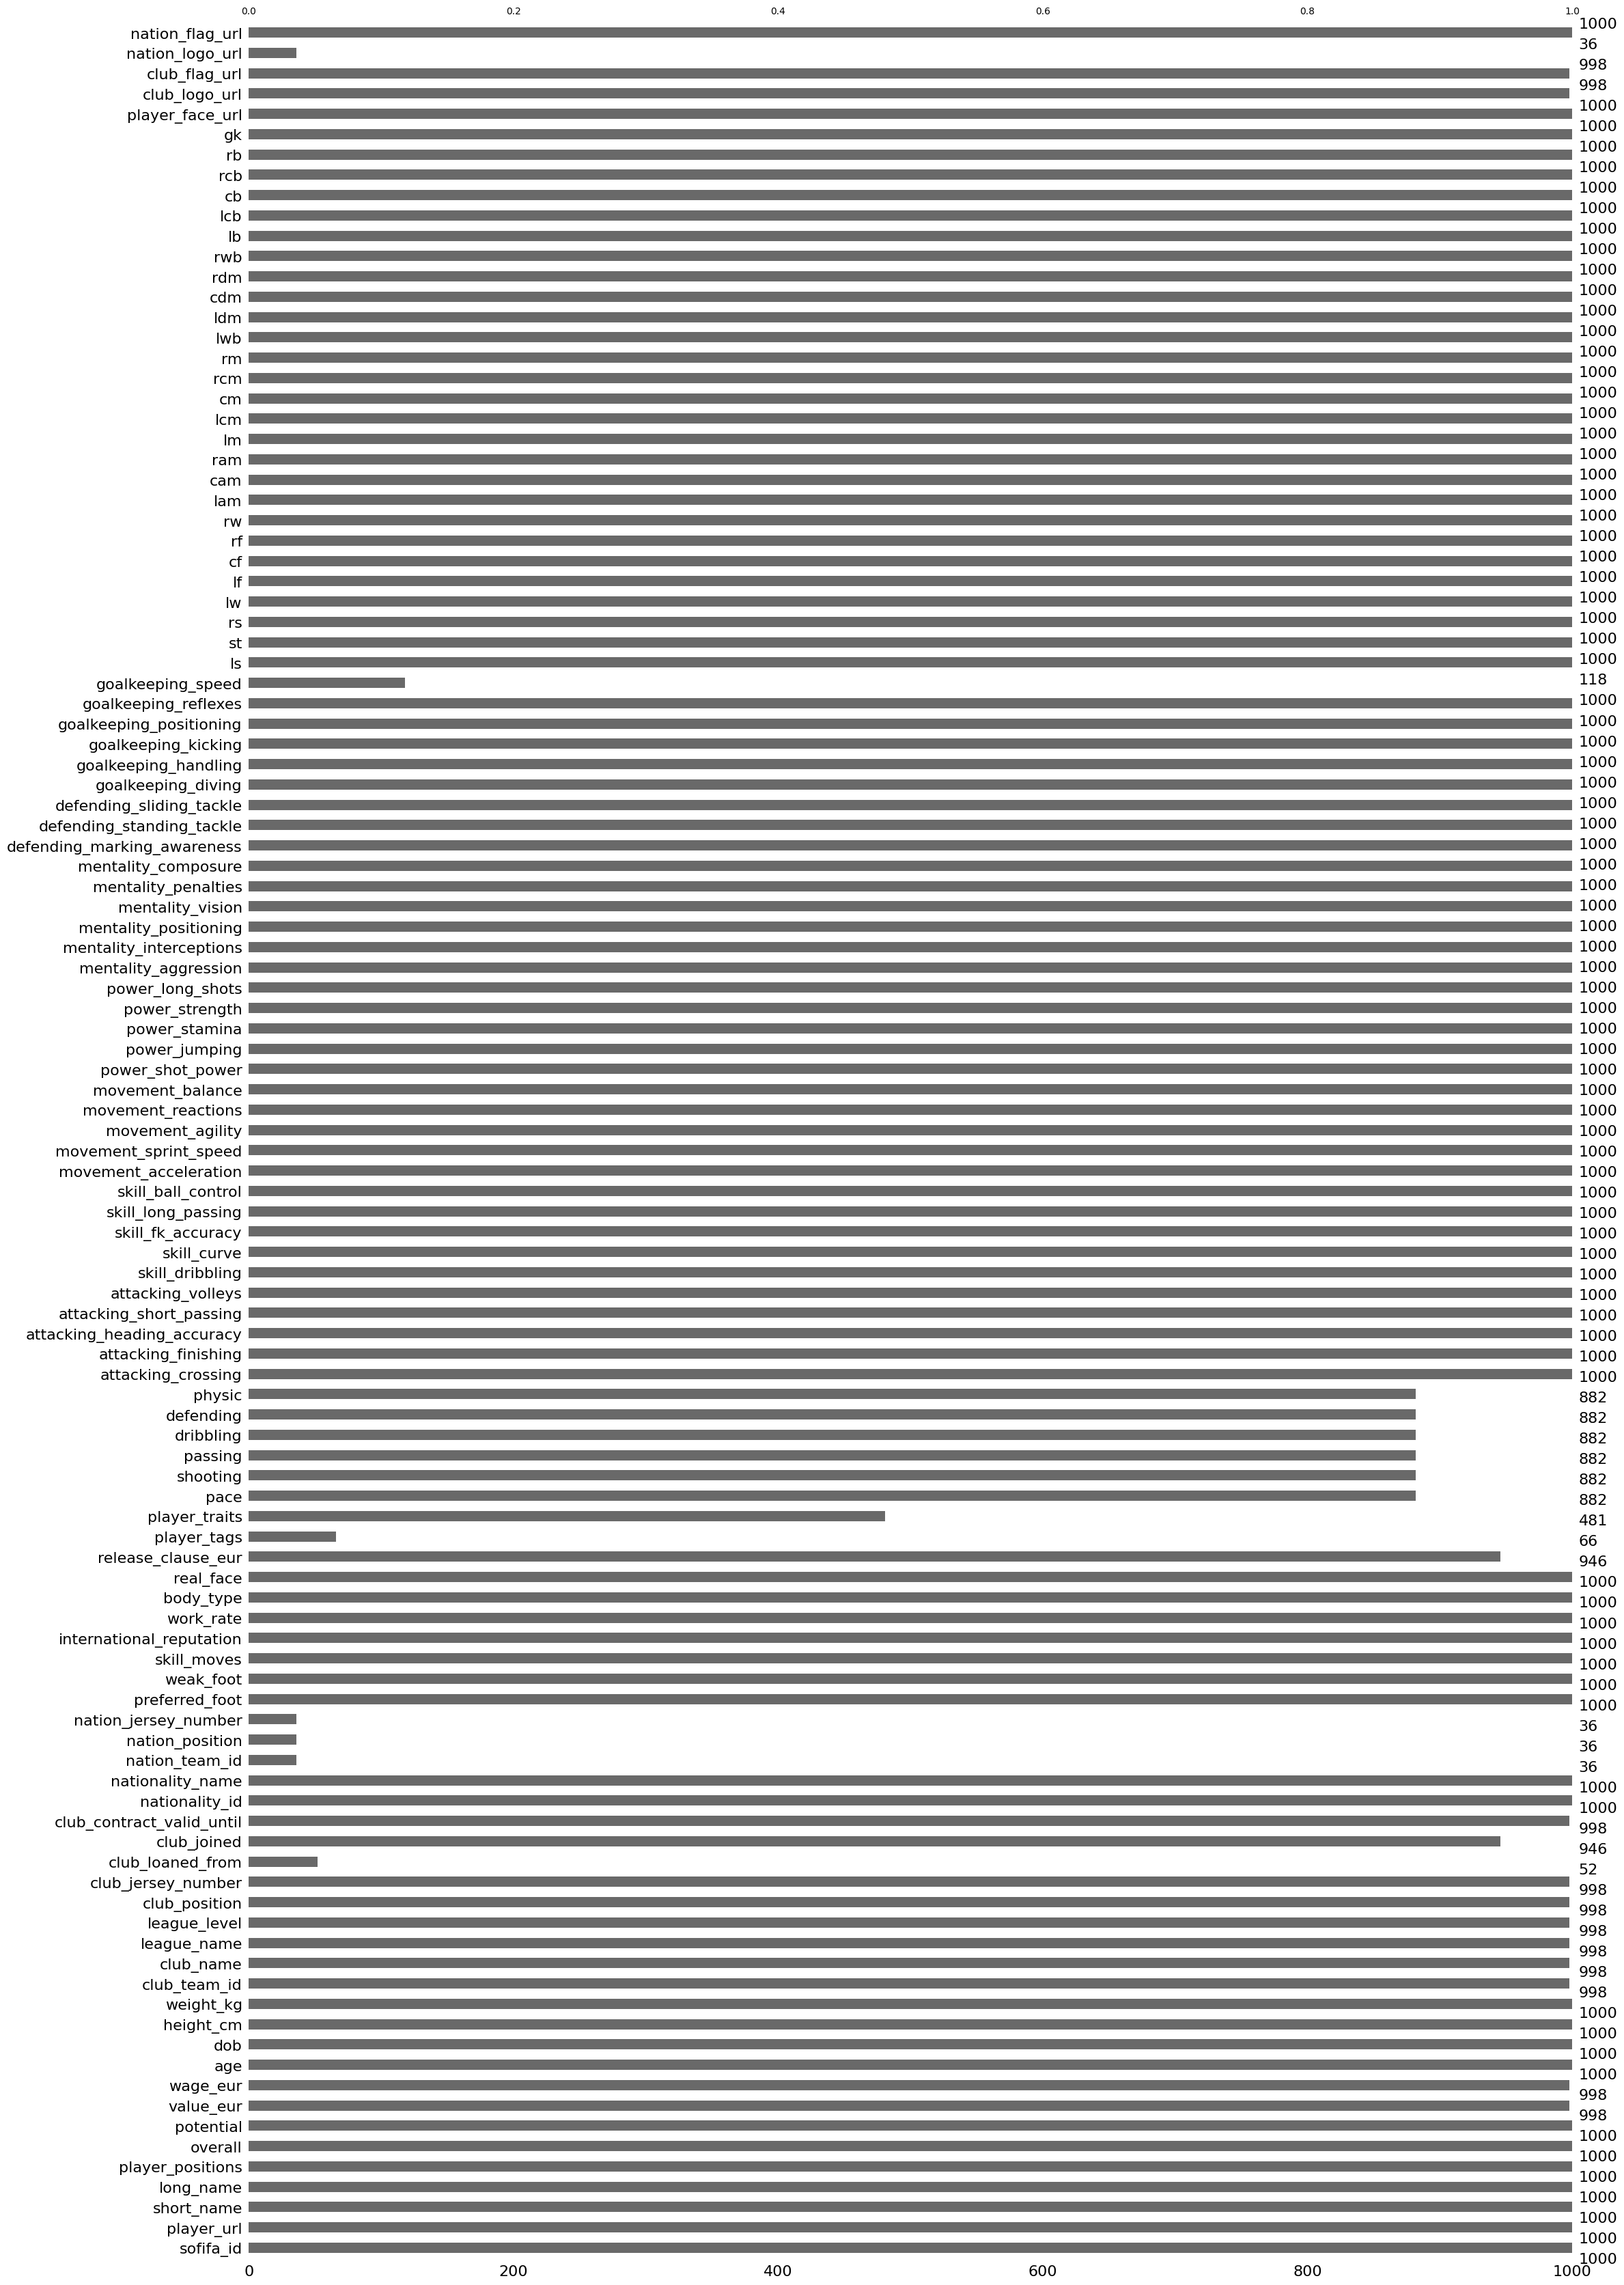

In [92]:
msno.bar(df.sample(1000))

In [93]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]
df[features].head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


<Axes: >

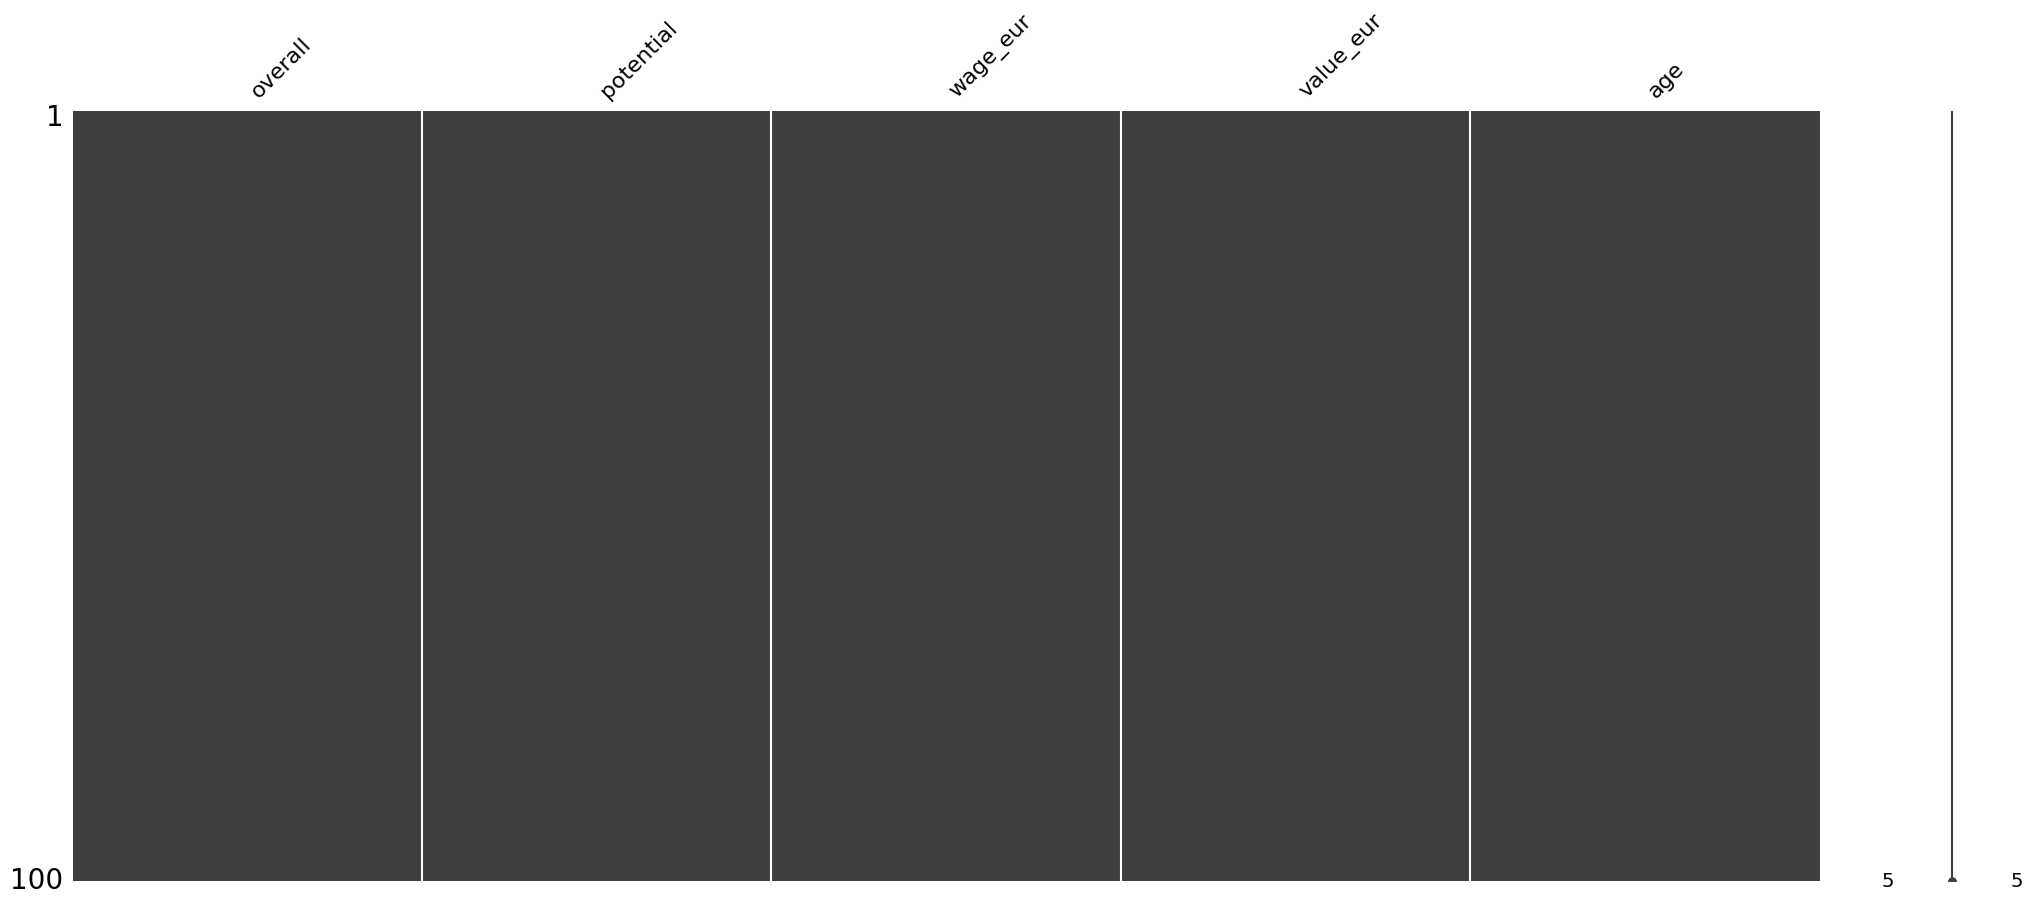

In [94]:
msno.matrix(df[features].sample(100))

<Axes: >

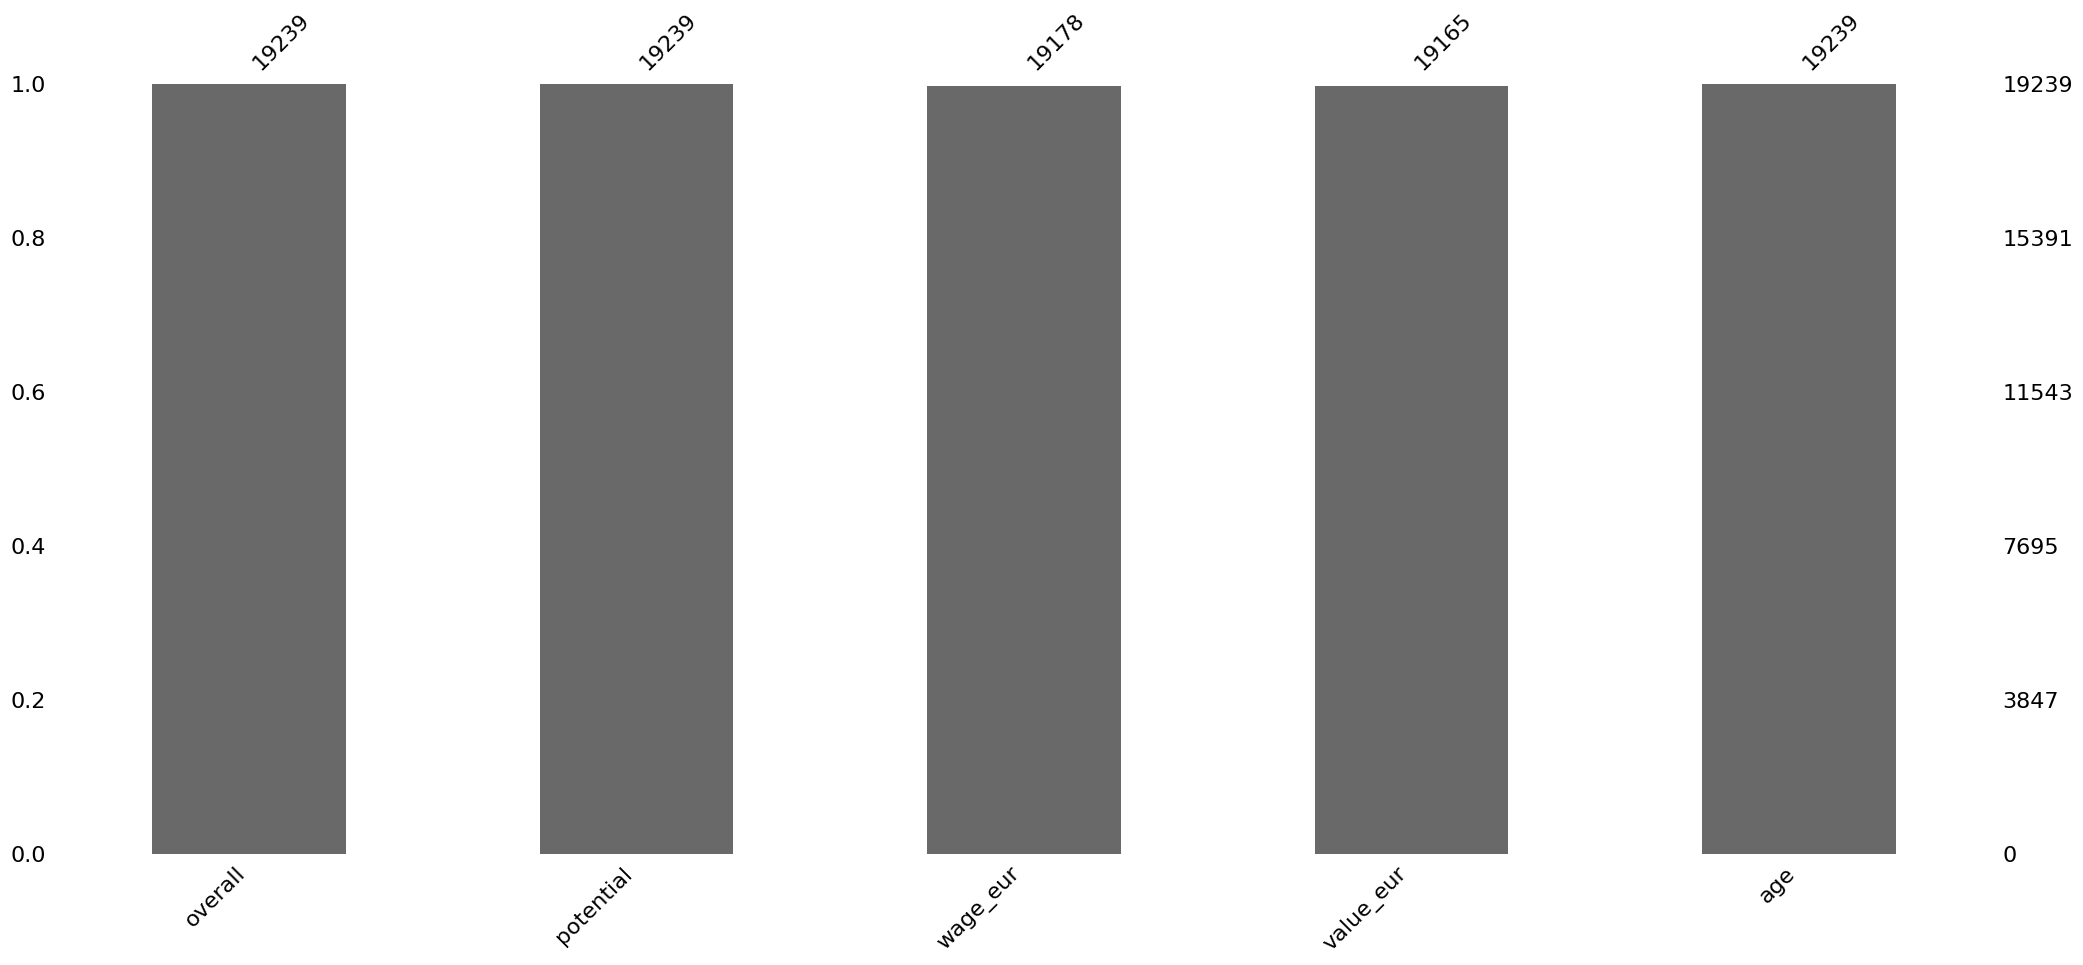

In [95]:
msno.bar(df[features])

In [96]:
df=df.dropna(subset=features)
print(df[features].isnull().sum())

overall      0
potential    0
wage_eur     0
value_eur    0
age          0
dtype: int64


In [97]:
features

['overall', 'potential', 'wage_eur', 'value_eur', 'age']

In [99]:
df_new_1=df[['short_name','overall', 'potential', 'wage_eur', 'value_eur', 'age']].copy()
df_new=df[features].copy()
df_new.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


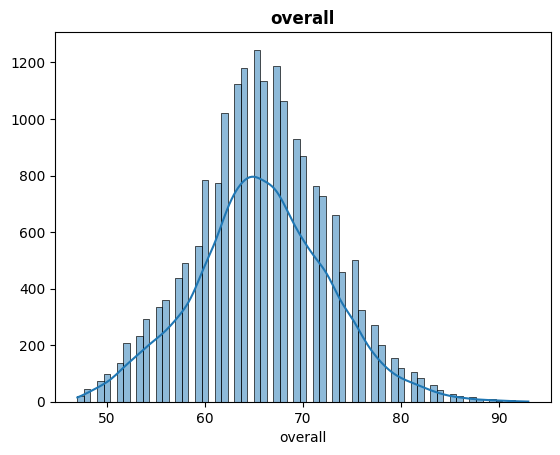

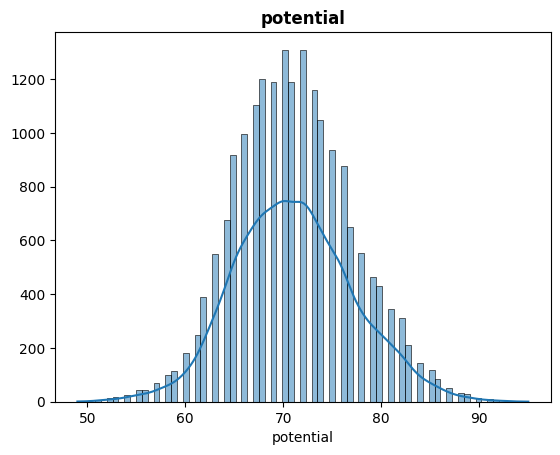

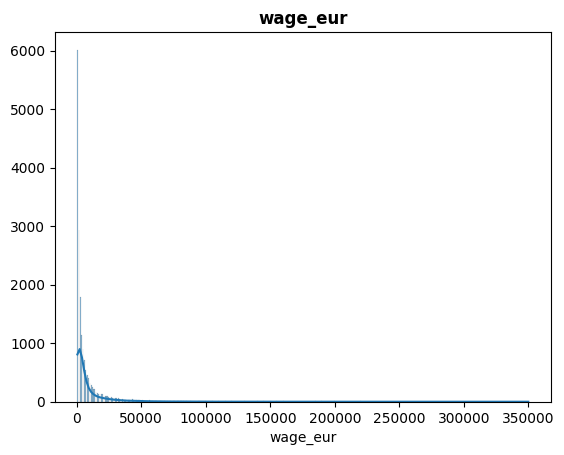

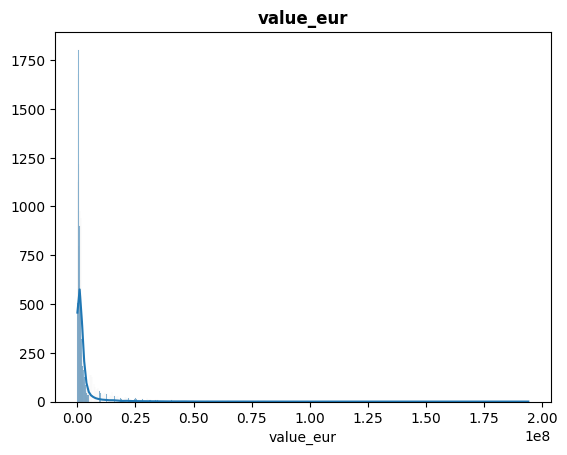

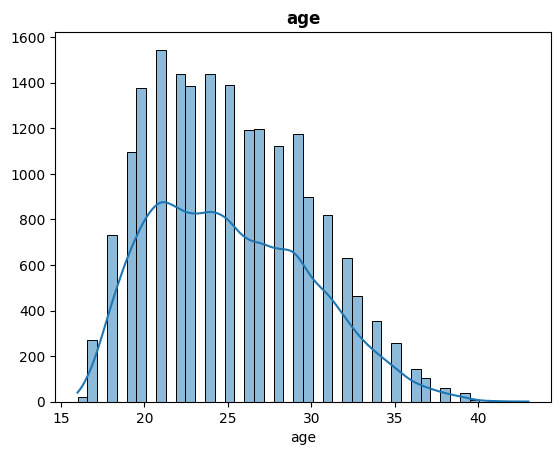

In [100]:
for i in features:
    sns.histplot(data=df_new,x=i,kde=True)
    plt.title(i,fontsize=12,weight='bold')
    plt.ylabel('')
    plt.show()

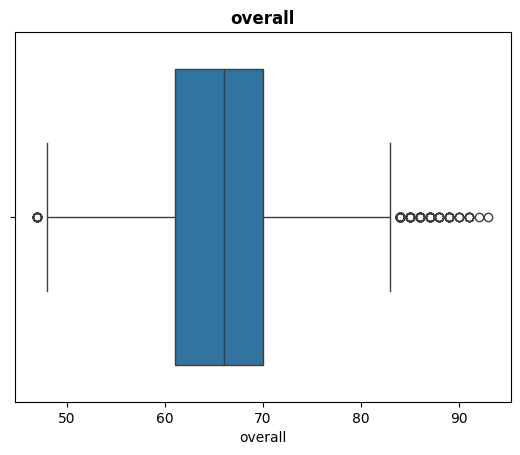

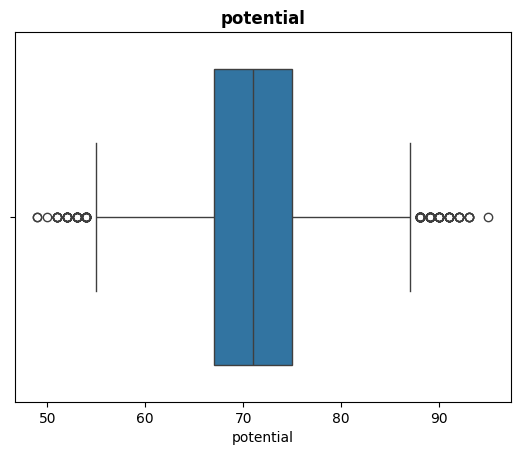

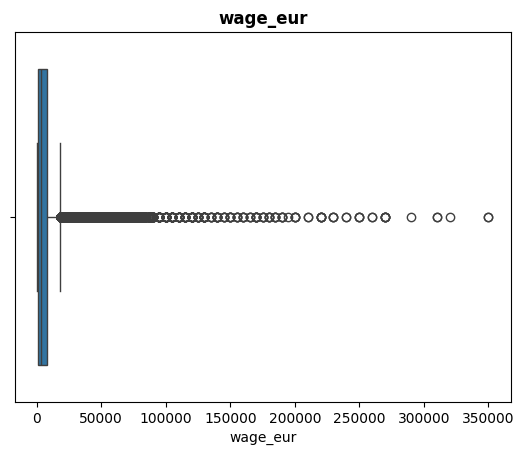

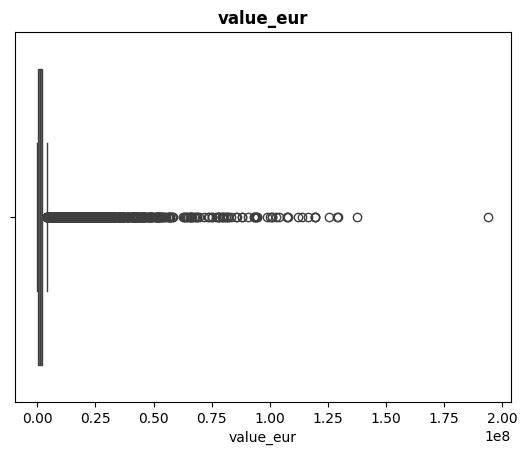

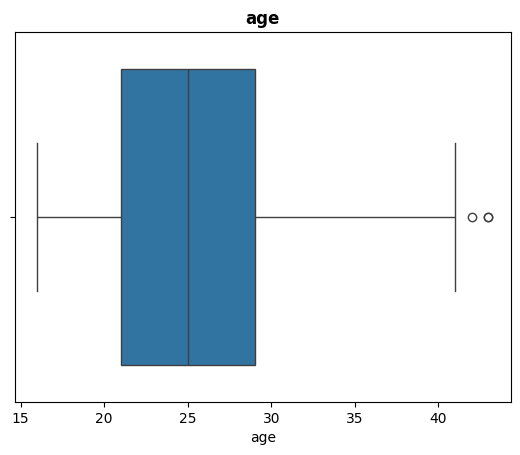

In [101]:
for i in features:
    sns.boxplot(data=df_new,x=i)
    plt.title(i,fontsize=12,weight='bold')
    plt.show()

In [102]:
print(df_new.shape)
df_new=df_new[(df_new['age']<40)]
df_new_1=df_new_1[(df_new_1['age']<40)]
print(df_new.shape)
print(df_new_1.shape)

(19165, 5)
(19151, 5)
(19151, 6)


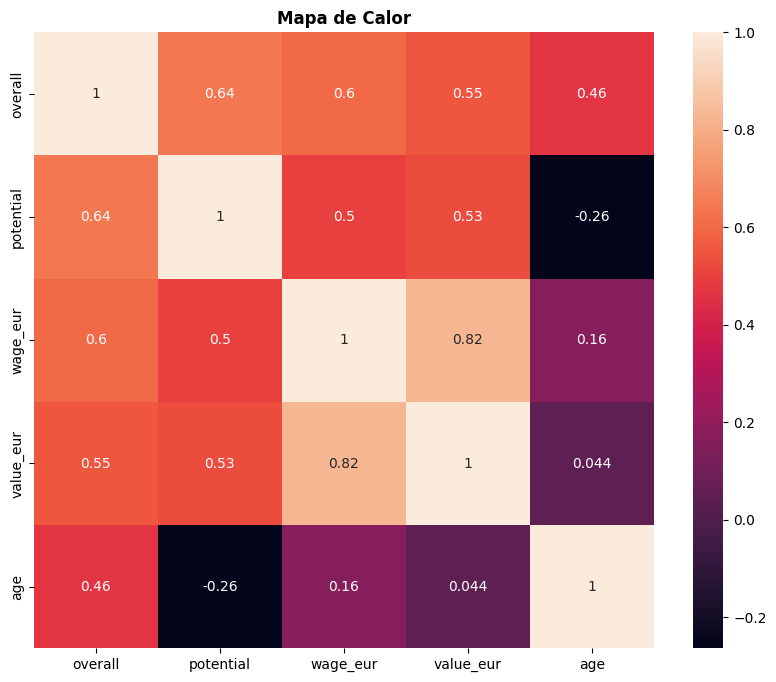

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot=True)
plt.title('Mapa de Calor',fontsize=12,weight='bold')
plt.show()

## **Data Preprocesing**

In [104]:
scaler=StandardScaler()
scaler.fit(df_new)
scaler_df_new=pd.DataFrame(scaler.transform(df_new),columns=df_new.columns)
scaler_df_new.head()

,overall,potential,wage_eur,value_eur,age
0,3.957993,3.601039,15.962574,9.867132,1.872988
1,3.812699,3.436740,13.396043,15.316214,1.448345
2,3.667405,3.272440,13.396043,5.534127,2.297631
3,3.667405,3.272440,13.396043,16.563594,0.811381
4,3.667405,3.272440,17.502492,16.104033,1.023702


In [105]:
scaler_df_new.describe()

,overall,potential,wage_eur,value_eur,age
count,1.915100e+04,1.915100e+04,1.915100e+04,1.915100e+04,1.915100e+04
mean,-1.899629e-16,5.223979e-16,-4.749072e-17,2.968170e-17,-4.749072e-17
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-2.725538e+00,-3.628132e+00,-4.375579e-01,-3.733340e-01,-1.948799e+00
25%,-6.914199e-01,-6.707438e-01,-4.118926e-01,-3.121467e-01,-8.871914e-01
50%,3.505086e-02,-1.354648e-02,-3.092314e-01,-2.464951e-01,-3.790545e-02
75%,6.162275e-01,6.436509e-01,-5.257830e-02,-1.119093e-01,8.113805e-01
max,3.957993e+00,3.929638e+00,1.750249e+01,2.509830e+01,2.934595e+00


In [106]:
def random_centroids(data,k):
    centroids=[]
    for i in range(k):
        centroid=data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

centroids=random_centroids(scaler_df_new,5)
centroids.head()

,0,1,2,3,4
overall,-0.546126,-0.110243,-0.836714,-0.110243,-0.400832
potential,-0.506444,-0.506444,-0.999342,-0.506444,0.315052
wage_eur,0.512058,-0.360562,-0.427292,-0.360562,-0.206570
value_eur,-0.085649,-0.151300,2.448503,-0.308864,-0.151300
age,1.023702,0.599059,-0.250227,0.386738,-0.250227


In [107]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

labels=get_labels(scaler_df_new,centroids)
labels.value_counts()

4    9409
1    4577
3    3319
0    1530
2     316
Name: count, dtype: int64

In [108]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [109]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

## **Clustering**

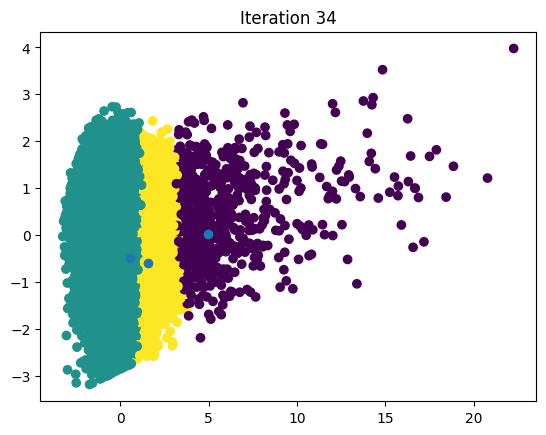

In [110]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(scaler_df_new, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(scaler_df_new, centroids)
    centroids = new_centroids(scaler_df_new, labels, centroid_count)
    plot_clusters(scaler_df_new, labels, centroids, iteration)
    iteration += 1

In [111]:
centroids

,0,1,2
overall,2.140079,0.275279,1.215535
potential,1.968791,0.469551,0.895672
wage_eur,2.655886,0.177666,0.620430
value_eur,3.039451,0.035759,0.299093
age,0.633703,0.726788,0.780126


In [112]:
labels.value_counts()

1    15853
2     2545
0      753
Name: count, dtype: int64

## **Evaluating Models**

In [114]:
df_new_1['labels']=labels
df_new_1.head()

,short_name,overall,potential,wage_eur,value_eur,age,labels
0,L. Messi,93,93,320000.0,78000000.0,34,0.0
1,R. Lewandowski,92,92,270000.0,119500000.0,32,0.0
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36,0.0
3,Neymar Jr,91,91,270000.0,129000000.0,29,0.0
4,K. De Bruyne,91,91,350000.0,125500000.0,30,0.0


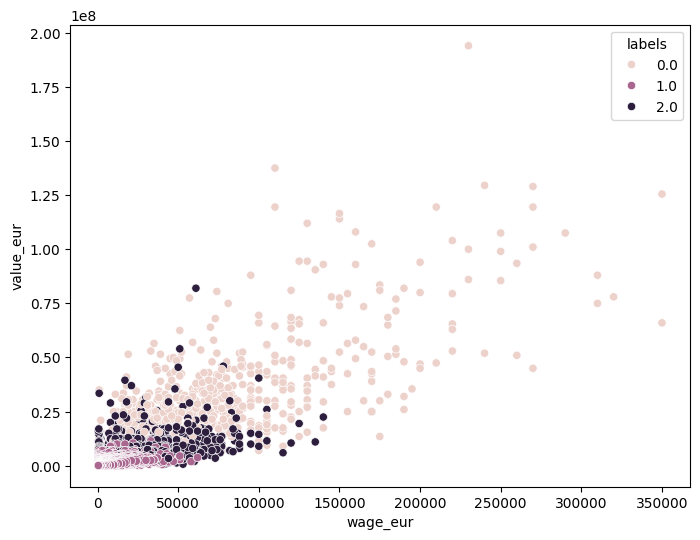

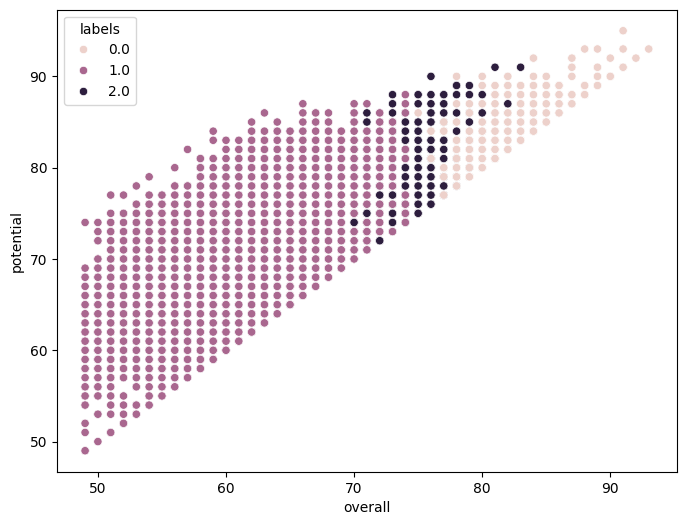

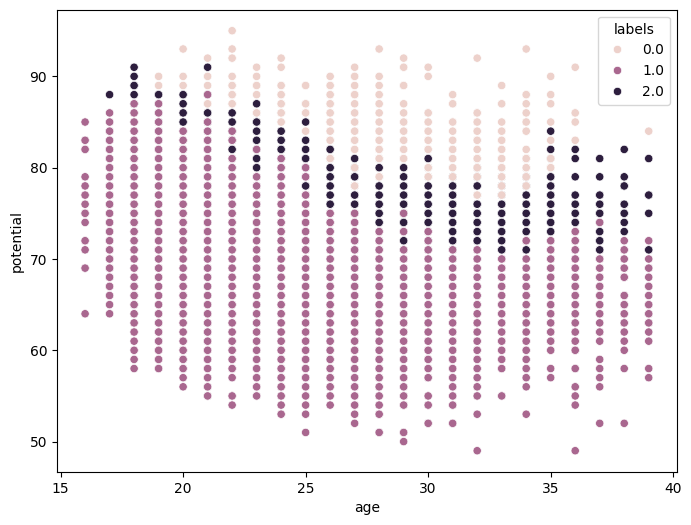

In [121]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_new_1,x='wage_eur',y='value_eur',hue='labels')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_new_1,x='overall',y='potential',hue='labels')
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(data=df_new_1,x='age',y='potential',hue='labels')
plt.show()

## **The Conclusion**
* 0 represents a Good Soccer Player
* 1 represents a Median Soccer Player
* 2 represents a Normal Soccer Player